##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 1s

15540224/26421880 [================>.............] - ETA: 0s

26427392/26421880 [==============================] - 0s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

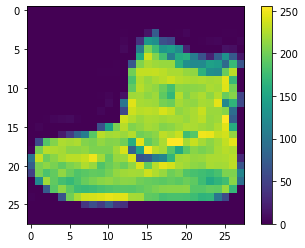

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

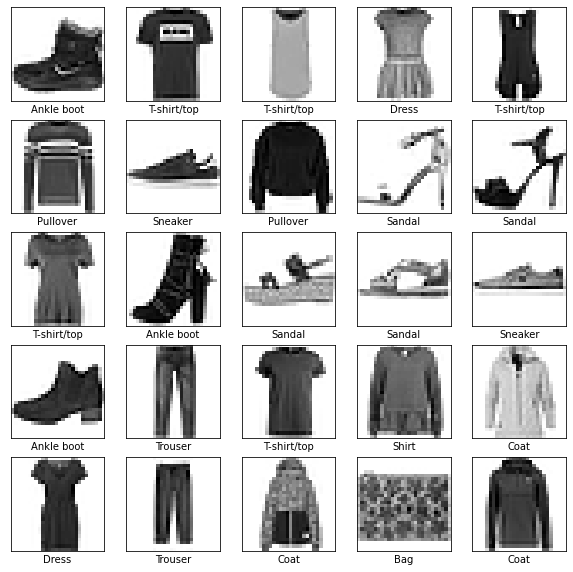

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 20:09 - loss: 2.6234 - accuracy: 0.0625

  33/1875 [..............................] - ETA: 2s - loss: 1.3576 - accuracy: 0.5710   

  67/1875 [>.............................] - ETA: 2s - loss: 1.0902 - accuracy: 0.6427

 102/1875 [>.............................] - ETA: 2s - loss: 0.9653 - accuracy: 0.6783

 135/1875 [=>............................] - ETA: 2s - loss: 0.8869 - accuracy: 0.7019

 169/1875 [=>............................] - ETA: 2s - loss: 0.8312 - accuracy: 0.7180

 202/1875 [==>...........................] - ETA: 2s - loss: 0.7968 - accuracy: 0.7322

 237/1875 [==>...........................] - ETA: 2s - loss: 0.7649 - accuracy: 0.7429

 273/1875 [===>..........................] - ETA: 2s - loss: 0.7447 - accuracy: 0.7477

 309/1875 [===>..........................] - ETA: 2s - loss: 0.7218 - accuracy: 0.7540

 345/1875 [====>.........................] - ETA: 2s - loss: 0.7007 - accuracy: 0.7612

 382/1875 [=====>........................] - ETA: 2s - loss: 0.6814 - accuracy: 0.7673

 418/1875 [=====>........................] - ETA: 2s - loss: 0.6657 - accuracy: 0.7725

 453/1875 [======>.......................] - ETA: 2s - loss: 0.6563 - accuracy: 0.7764

 487/1875 [======>.......................] - ETA: 2s - loss: 0.6440 - accuracy: 0.7802

 523/1875 [=======>......................] - ETA: 1s - loss: 0.6355 - accuracy: 0.7832

 559/1875 [=======>......................] - ETA: 1s - loss: 0.6252 - accuracy: 0.7866

 595/1875 [========>.....................] - ETA: 1s - loss: 0.6184 - accuracy: 0.7887

 632/1875 [=========>....................] - ETA: 1s - loss: 0.6092 - accuracy: 0.7918

 669/1875 [=========>....................] - ETA: 1s - loss: 0.6022 - accuracy: 0.7937

 705/1875 [==========>...................] - ETA: 1s - loss: 0.5969 - accuracy: 0.7958

 741/1875 [==========>...................] - ETA: 1s - loss: 0.5912 - accuracy: 0.7977

 776/1875 [===========>..................] - ETA: 1s - loss: 0.5846 - accuracy: 0.7992

 811/1875 [===========>..................] - ETA: 1s - loss: 0.5792 - accuracy: 0.8011

 847/1875 [============>.................] - ETA: 1s - loss: 0.5747 - accuracy: 0.8022

 882/1875 [=============>................] - ETA: 1s - loss: 0.5697 - accuracy: 0.8036

 917/1875 [=============>................] - ETA: 1s - loss: 0.5673 - accuracy: 0.8038

 953/1875 [==============>...............] - ETA: 1s - loss: 0.5626 - accuracy: 0.8052

 990/1875 [==============>...............] - ETA: 1s - loss: 0.5577 - accuracy: 0.8072

1025/1875 [===============>..............] - ETA: 1s - loss: 0.5536 - accuracy: 0.8085

1061/1875 [===============>..............] - ETA: 1s - loss: 0.5500 - accuracy: 0.8096

1097/1875 [================>.............] - ETA: 1s - loss: 0.5475 - accuracy: 0.8105

1133/1875 [=================>............] - ETA: 1s - loss: 0.5431 - accuracy: 0.8117

1170/1875 [=================>............] - ETA: 1s - loss: 0.5401 - accuracy: 0.8127

1207/1875 [==================>...........] - ETA: 0s - loss: 0.5391 - accuracy: 0.8129

1243/1875 [==================>...........] - ETA: 0s - loss: 0.5369 - accuracy: 0.8136

1279/1875 [===================>..........] - ETA: 0s - loss: 0.5341 - accuracy: 0.8144

1315/1875 [====================>.........] - ETA: 0s - loss: 0.5308 - accuracy: 0.8156

1352/1875 [====================>.........] - ETA: 0s - loss: 0.5272 - accuracy: 0.8167

1389/1875 [=====================>........] - ETA: 0s - loss: 0.5245 - accuracy: 0.8176

1426/1875 [=====================>........] - ETA: 0s - loss: 0.5221 - accuracy: 0.8184

1462/1875 [======================>.......] - ETA: 0s - loss: 0.5194 - accuracy: 0.8189

1498/1875 [======================>.......] - ETA: 0s - loss: 0.5166 - accuracy: 0.8196

1533/1875 [=======================>......] - ETA: 0s - loss: 0.5139 - accuracy: 0.8205

1569/1875 [========================>.....] - ETA: 0s - loss: 0.5119 - accuracy: 0.8215

1605/1875 [========================>.....] - ETA: 0s - loss: 0.5115 - accuracy: 0.8216

1642/1875 [=========================>....] - ETA: 0s - loss: 0.5095 - accuracy: 0.8222

1679/1875 [=========================>....] - ETA: 0s - loss: 0.5070 - accuracy: 0.8229

1712/1875 [==========================>...] - ETA: 0s - loss: 0.5060 - accuracy: 0.8233

1745/1875 [==========================>...] - ETA: 0s - loss: 0.5041 - accuracy: 0.8238

1780/1875 [===========================>..] - ETA: 0s - loss: 0.5026 - accuracy: 0.8243

1816/1875 [============================>.] - ETA: 0s - loss: 0.5010 - accuracy: 0.8249

1851/1875 [============================>.] - ETA: 0s - loss: 0.4991 - accuracy: 0.8254

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4982 - accuracy: 0.8256


Epoch 2/10
   1/1875 [..............................] - ETA: 2s - loss: 0.4111 - accuracy: 0.8125

  38/1875 [..............................] - ETA: 2s - loss: 0.4556 - accuracy: 0.8322

  74/1875 [>.............................] - ETA: 2s - loss: 0.4149 - accuracy: 0.8505

 110/1875 [>.............................] - ETA: 2s - loss: 0.3904 - accuracy: 0.8605

 146/1875 [=>............................] - ETA: 2s - loss: 0.3894 - accuracy: 0.8630

 183/1875 [=>............................] - ETA: 2s - loss: 0.3899 - accuracy: 0.8627

 220/1875 [==>...........................] - ETA: 2s - loss: 0.3875 - accuracy: 0.8634

 257/1875 [===>..........................] - ETA: 2s - loss: 0.3823 - accuracy: 0.8653

 294/1875 [===>..........................] - ETA: 2s - loss: 0.3807 - accuracy: 0.8645

 331/1875 [====>.........................] - ETA: 2s - loss: 0.3829 - accuracy: 0.8642

 367/1875 [====>.........................] - ETA: 2s - loss: 0.3780 - accuracy: 0.8670

 403/1875 [=====>........................] - ETA: 2s - loss: 0.3786 - accuracy: 0.8669

 439/1875 [======>.......................] - ETA: 1s - loss: 0.3751 - accuracy: 0.8684

 475/1875 [======>.......................] - ETA: 1s - loss: 0.3764 - accuracy: 0.8684

 512/1875 [=======>......................] - ETA: 1s - loss: 0.3791 - accuracy: 0.8668

 549/1875 [=======>......................] - ETA: 1s - loss: 0.3794 - accuracy: 0.8665

 586/1875 [========>.....................] - ETA: 1s - loss: 0.3815 - accuracy: 0.8660

 623/1875 [========>.....................] - ETA: 1s - loss: 0.3798 - accuracy: 0.8663

 660/1875 [=========>....................] - ETA: 1s - loss: 0.3811 - accuracy: 0.8653

 697/1875 [==========>...................] - ETA: 1s - loss: 0.3817 - accuracy: 0.8655

 733/1875 [==========>...................] - ETA: 1s - loss: 0.3814 - accuracy: 0.8655

 769/1875 [===========>..................] - ETA: 1s - loss: 0.3805 - accuracy: 0.8654

 805/1875 [===========>..................] - ETA: 1s - loss: 0.3806 - accuracy: 0.8651

 841/1875 [============>.................] - ETA: 1s - loss: 0.3819 - accuracy: 0.8644

 878/1875 [=============>................] - ETA: 1s - loss: 0.3810 - accuracy: 0.8645

 915/1875 [=============>................] - ETA: 1s - loss: 0.3817 - accuracy: 0.8640

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3809 - accuracy: 0.8641

 988/1875 [==============>...............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8642

1024/1875 [===============>..............] - ETA: 1s - loss: 0.3801 - accuracy: 0.8644

1060/1875 [===============>..............] - ETA: 1s - loss: 0.3768 - accuracy: 0.8657

1097/1875 [================>.............] - ETA: 1s - loss: 0.3789 - accuracy: 0.8651

1132/1875 [=================>............] - ETA: 1s - loss: 0.3790 - accuracy: 0.8647

1167/1875 [=================>............] - ETA: 0s - loss: 0.3783 - accuracy: 0.8648

1202/1875 [==================>...........] - ETA: 0s - loss: 0.3775 - accuracy: 0.8653

1237/1875 [==================>...........] - ETA: 0s - loss: 0.3769 - accuracy: 0.8652

1273/1875 [===================>..........] - ETA: 0s - loss: 0.3763 - accuracy: 0.8656

1309/1875 [===================>..........] - ETA: 0s - loss: 0.3767 - accuracy: 0.8651

1345/1875 [====================>.........] - ETA: 0s - loss: 0.3760 - accuracy: 0.8654

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3764 - accuracy: 0.8656

1416/1875 [=====================>........] - ETA: 0s - loss: 0.3775 - accuracy: 0.8654

1452/1875 [======================>.......] - ETA: 0s - loss: 0.3772 - accuracy: 0.8655

1487/1875 [======================>.......] - ETA: 0s - loss: 0.3781 - accuracy: 0.8653

1523/1875 [=======================>......] - ETA: 0s - loss: 0.3778 - accuracy: 0.8654

1559/1875 [=======================>......] - ETA: 0s - loss: 0.3770 - accuracy: 0.8657

1595/1875 [========================>.....] - ETA: 0s - loss: 0.3766 - accuracy: 0.8656

1632/1875 [=========================>....] - ETA: 0s - loss: 0.3767 - accuracy: 0.8657

1668/1875 [=========================>....] - ETA: 0s - loss: 0.3775 - accuracy: 0.8656

1704/1875 [==========================>...] - ETA: 0s - loss: 0.3777 - accuracy: 0.8653

1740/1875 [==========================>...] - ETA: 0s - loss: 0.3770 - accuracy: 0.8652

1775/1875 [===========================>..] - ETA: 0s - loss: 0.3759 - accuracy: 0.8656

1811/1875 [===========================>..] - ETA: 0s - loss: 0.3761 - accuracy: 0.8654

1846/1875 [============================>.] - ETA: 0s - loss: 0.3754 - accuracy: 0.8655

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3747 - accuracy: 0.8658


Epoch 3/10
   1/1875 [..............................] - ETA: 3s - loss: 0.4009 - accuracy: 0.8125

  38/1875 [..............................] - ETA: 2s - loss: 0.3922 - accuracy: 0.8454

  74/1875 [>.............................] - ETA: 2s - loss: 0.3757 - accuracy: 0.8568

 111/1875 [>.............................] - ETA: 2s - loss: 0.3744 - accuracy: 0.8604

 148/1875 [=>............................] - ETA: 2s - loss: 0.3658 - accuracy: 0.8634

 184/1875 [=>............................] - ETA: 2s - loss: 0.3689 - accuracy: 0.8650

 220/1875 [==>...........................] - ETA: 2s - loss: 0.3688 - accuracy: 0.8643

 256/1875 [===>..........................] - ETA: 2s - loss: 0.3691 - accuracy: 0.8649

 292/1875 [===>..........................] - ETA: 2s - loss: 0.3642 - accuracy: 0.8682

 328/1875 [====>.........................] - ETA: 2s - loss: 0.3648 - accuracy: 0.8682

 364/1875 [====>.........................] - ETA: 2s - loss: 0.3654 - accuracy: 0.8663

 400/1875 [=====>........................] - ETA: 2s - loss: 0.3663 - accuracy: 0.8657

 436/1875 [=====>........................] - ETA: 2s - loss: 0.3640 - accuracy: 0.8656

 473/1875 [======>.......................] - ETA: 1s - loss: 0.3603 - accuracy: 0.8671

 510/1875 [=======>......................] - ETA: 1s - loss: 0.3560 - accuracy: 0.8693

 546/1875 [=======>......................] - ETA: 1s - loss: 0.3509 - accuracy: 0.8712

 582/1875 [========>.....................] - ETA: 1s - loss: 0.3504 - accuracy: 0.8712

 617/1875 [========>.....................] - ETA: 1s - loss: 0.3520 - accuracy: 0.8709

 654/1875 [=========>....................] - ETA: 1s - loss: 0.3500 - accuracy: 0.8721

 691/1875 [==========>...................] - ETA: 1s - loss: 0.3500 - accuracy: 0.8715

 727/1875 [==========>...................] - ETA: 1s - loss: 0.3515 - accuracy: 0.8716

 763/1875 [===========>..................] - ETA: 1s - loss: 0.3490 - accuracy: 0.8723

 799/1875 [===========>..................] - ETA: 1s - loss: 0.3490 - accuracy: 0.8721

 835/1875 [============>.................] - ETA: 1s - loss: 0.3475 - accuracy: 0.8726

 871/1875 [============>.................] - ETA: 1s - loss: 0.3471 - accuracy: 0.8726

 907/1875 [=============>................] - ETA: 1s - loss: 0.3455 - accuracy: 0.8728

 943/1875 [==============>...............] - ETA: 1s - loss: 0.3431 - accuracy: 0.8733

 979/1875 [==============>...............] - ETA: 1s - loss: 0.3439 - accuracy: 0.8733

1016/1875 [===============>..............] - ETA: 1s - loss: 0.3429 - accuracy: 0.8737

1052/1875 [===============>..............] - ETA: 1s - loss: 0.3432 - accuracy: 0.8737

1088/1875 [================>.............] - ETA: 1s - loss: 0.3434 - accuracy: 0.8737

1123/1875 [================>.............] - ETA: 1s - loss: 0.3429 - accuracy: 0.8736

1160/1875 [=================>............] - ETA: 1s - loss: 0.3415 - accuracy: 0.8741

1197/1875 [==================>...........] - ETA: 0s - loss: 0.3412 - accuracy: 0.8741

1233/1875 [==================>...........] - ETA: 0s - loss: 0.3410 - accuracy: 0.8741

1269/1875 [===================>..........] - ETA: 0s - loss: 0.3404 - accuracy: 0.8742

1306/1875 [===================>..........] - ETA: 0s - loss: 0.3399 - accuracy: 0.8744

1342/1875 [====================>.........] - ETA: 0s - loss: 0.3398 - accuracy: 0.8744

1378/1875 [=====================>........] - ETA: 0s - loss: 0.3395 - accuracy: 0.8745

1414/1875 [=====================>........] - ETA: 0s - loss: 0.3397 - accuracy: 0.8743

1451/1875 [======================>.......] - ETA: 0s - loss: 0.3390 - accuracy: 0.8745

1488/1875 [======================>.......] - ETA: 0s - loss: 0.3384 - accuracy: 0.8750

1525/1875 [=======================>......] - ETA: 0s - loss: 0.3374 - accuracy: 0.8754

1562/1875 [=======================>......] - ETA: 0s - loss: 0.3370 - accuracy: 0.8756

1598/1875 [========================>.....] - ETA: 0s - loss: 0.3360 - accuracy: 0.8760

1635/1875 [=========================>....] - ETA: 0s - loss: 0.3357 - accuracy: 0.8762

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3350 - accuracy: 0.8765

1708/1875 [==========================>...] - ETA: 0s - loss: 0.3357 - accuracy: 0.8764

1744/1875 [==========================>...] - ETA: 0s - loss: 0.3361 - accuracy: 0.8765

1781/1875 [===========================>..] - ETA: 0s - loss: 0.3361 - accuracy: 0.8767

1818/1875 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8769

1855/1875 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8768

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3356 - accuracy: 0.8770


Epoch 4/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8914

  75/1875 [>.............................] - ETA: 2s - loss: 0.3041 - accuracy: 0.8942

 112/1875 [>.............................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8923

 148/1875 [=>............................] - ETA: 2s - loss: 0.2883 - accuracy: 0.8974

 185/1875 [=>............................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8939

 220/1875 [==>...........................] - ETA: 2s - loss: 0.2948 - accuracy: 0.8918

 255/1875 [===>..........................] - ETA: 2s - loss: 0.2995 - accuracy: 0.8907

 292/1875 [===>..........................] - ETA: 2s - loss: 0.2972 - accuracy: 0.8915

 329/1875 [====>.........................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8917

 366/1875 [====>.........................] - ETA: 2s - loss: 0.2974 - accuracy: 0.8915

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2993 - accuracy: 0.8904

 440/1875 [======>.......................] - ETA: 1s - loss: 0.2990 - accuracy: 0.8908

 477/1875 [======>.......................] - ETA: 1s - loss: 0.3001 - accuracy: 0.8910

 513/1875 [=======>......................] - ETA: 1s - loss: 0.2976 - accuracy: 0.8918

 549/1875 [=======>......................] - ETA: 1s - loss: 0.2990 - accuracy: 0.8912

 585/1875 [========>.....................] - ETA: 1s - loss: 0.3002 - accuracy: 0.8894

 621/1875 [========>.....................] - ETA: 1s - loss: 0.3018 - accuracy: 0.8892

 658/1875 [=========>....................] - ETA: 1s - loss: 0.3071 - accuracy: 0.8876

 694/1875 [==========>...................] - ETA: 1s - loss: 0.3071 - accuracy: 0.8874

 731/1875 [==========>...................] - ETA: 1s - loss: 0.3075 - accuracy: 0.8873

 768/1875 [===========>..................] - ETA: 1s - loss: 0.3075 - accuracy: 0.8873

 806/1875 [===========>..................] - ETA: 1s - loss: 0.3088 - accuracy: 0.8864

 843/1875 [============>.................] - ETA: 1s - loss: 0.3097 - accuracy: 0.8861

 880/1875 [=============>................] - ETA: 1s - loss: 0.3089 - accuracy: 0.8867

 917/1875 [=============>................] - ETA: 1s - loss: 0.3101 - accuracy: 0.8865

 954/1875 [==============>...............] - ETA: 1s - loss: 0.3107 - accuracy: 0.8858

 990/1875 [==============>...............] - ETA: 1s - loss: 0.3097 - accuracy: 0.8862

1027/1875 [===============>..............] - ETA: 1s - loss: 0.3107 - accuracy: 0.8856

1064/1875 [================>.............] - ETA: 1s - loss: 0.3105 - accuracy: 0.8856

1101/1875 [================>.............] - ETA: 1s - loss: 0.3101 - accuracy: 0.8856

1139/1875 [=================>............] - ETA: 1s - loss: 0.3108 - accuracy: 0.8856

1176/1875 [=================>............] - ETA: 0s - loss: 0.3112 - accuracy: 0.8853

1213/1875 [==================>...........] - ETA: 0s - loss: 0.3113 - accuracy: 0.8856

1250/1875 [===================>..........] - ETA: 0s - loss: 0.3120 - accuracy: 0.8853

1287/1875 [===================>..........] - ETA: 0s - loss: 0.3112 - accuracy: 0.8853

1323/1875 [====================>.........] - ETA: 0s - loss: 0.3121 - accuracy: 0.8853

1360/1875 [====================>.........] - ETA: 0s - loss: 0.3113 - accuracy: 0.8857

1397/1875 [=====================>........] - ETA: 0s - loss: 0.3113 - accuracy: 0.8856

1434/1875 [=====================>........] - ETA: 0s - loss: 0.3112 - accuracy: 0.8856

1471/1875 [======================>.......] - ETA: 0s - loss: 0.3114 - accuracy: 0.8854

1508/1875 [=======================>......] - ETA: 0s - loss: 0.3112 - accuracy: 0.8853

1545/1875 [=======================>......] - ETA: 0s - loss: 0.3097 - accuracy: 0.8860

1582/1875 [========================>.....] - ETA: 0s - loss: 0.3103 - accuracy: 0.8858

1619/1875 [========================>.....] - ETA: 0s - loss: 0.3110 - accuracy: 0.8856

1656/1875 [=========================>....] - ETA: 0s - loss: 0.3106 - accuracy: 0.8858

1692/1875 [==========================>...] - ETA: 0s - loss: 0.3110 - accuracy: 0.8855

1728/1875 [==========================>...] - ETA: 0s - loss: 0.3112 - accuracy: 0.8855

1765/1875 [===========================>..] - ETA: 0s - loss: 0.3112 - accuracy: 0.8855

1802/1875 [===========================>..] - ETA: 0s - loss: 0.3113 - accuracy: 0.8855

1839/1875 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.8855

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3112 - accuracy: 0.8856


Epoch 5/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2060 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.3118 - accuracy: 0.8775

  76/1875 [>.............................] - ETA: 2s - loss: 0.3214 - accuracy: 0.8812

 113/1875 [>.............................] - ETA: 2s - loss: 0.3069 - accuracy: 0.8874

 150/1875 [=>............................] - ETA: 2s - loss: 0.2954 - accuracy: 0.8894

 187/1875 [=>............................] - ETA: 2s - loss: 0.2882 - accuracy: 0.8919

 224/1875 [==>...........................] - ETA: 2s - loss: 0.2863 - accuracy: 0.8927

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2898 - accuracy: 0.8915

 298/1875 [===>..........................] - ETA: 2s - loss: 0.2889 - accuracy: 0.8920

 335/1875 [====>.........................] - ETA: 2s - loss: 0.2941 - accuracy: 0.8914

 373/1875 [====>.........................] - ETA: 2s - loss: 0.2913 - accuracy: 0.8931

 410/1875 [=====>........................] - ETA: 1s - loss: 0.2901 - accuracy: 0.8925

 446/1875 [======>.......................] - ETA: 1s - loss: 0.2910 - accuracy: 0.8922

 483/1875 [======>.......................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8918

 520/1875 [=======>......................] - ETA: 1s - loss: 0.2936 - accuracy: 0.8916

 557/1875 [=======>......................] - ETA: 1s - loss: 0.2933 - accuracy: 0.8916

 593/1875 [========>.....................] - ETA: 1s - loss: 0.2936 - accuracy: 0.8913

 630/1875 [=========>....................] - ETA: 1s - loss: 0.2915 - accuracy: 0.8919

 666/1875 [=========>....................] - ETA: 1s - loss: 0.2918 - accuracy: 0.8919

 702/1875 [==========>...................] - ETA: 1s - loss: 0.2930 - accuracy: 0.8911

 739/1875 [==========>...................] - ETA: 1s - loss: 0.2935 - accuracy: 0.8907

 776/1875 [===========>..................] - ETA: 1s - loss: 0.2933 - accuracy: 0.8908

 813/1875 [============>.................] - ETA: 1s - loss: 0.2931 - accuracy: 0.8908

 850/1875 [============>.................] - ETA: 1s - loss: 0.2924 - accuracy: 0.8912

 887/1875 [=============>................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8915

 923/1875 [=============>................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8917

 960/1875 [==============>...............] - ETA: 1s - loss: 0.2928 - accuracy: 0.8924

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2933 - accuracy: 0.8924

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2950 - accuracy: 0.8919

1070/1875 [================>.............] - ETA: 1s - loss: 0.2945 - accuracy: 0.8919

1106/1875 [================>.............] - ETA: 1s - loss: 0.2946 - accuracy: 0.8918

1143/1875 [=================>............] - ETA: 1s - loss: 0.2945 - accuracy: 0.8919

1180/1875 [=================>............] - ETA: 0s - loss: 0.2947 - accuracy: 0.8919

1216/1875 [==================>...........] - ETA: 0s - loss: 0.2945 - accuracy: 0.8918

1252/1875 [===================>..........] - ETA: 0s - loss: 0.2935 - accuracy: 0.8924

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2938 - accuracy: 0.8926

1326/1875 [====================>.........] - ETA: 0s - loss: 0.2939 - accuracy: 0.8920

1363/1875 [====================>.........] - ETA: 0s - loss: 0.2934 - accuracy: 0.8920

1400/1875 [=====================>........] - ETA: 0s - loss: 0.2923 - accuracy: 0.8922

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2932 - accuracy: 0.8920

1473/1875 [======================>.......] - ETA: 0s - loss: 0.2920 - accuracy: 0.8922

1510/1875 [=======================>......] - ETA: 0s - loss: 0.2927 - accuracy: 0.8923

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2926 - accuracy: 0.8922

1582/1875 [========================>.....] - ETA: 0s - loss: 0.2935 - accuracy: 0.8919

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2935 - accuracy: 0.8919

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2941 - accuracy: 0.8914

1692/1875 [==========================>...] - ETA: 0s - loss: 0.2940 - accuracy: 0.8914

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2934 - accuracy: 0.8917

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2943 - accuracy: 0.8913

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2941 - accuracy: 0.8915

1838/1875 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.8914

1872/1875 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8915

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2941 - accuracy: 0.8915


Epoch 6/10
   1/1875 [..............................] - ETA: 3s - loss: 0.4965 - accuracy: 0.8125

  35/1875 [..............................] - ETA: 2s - loss: 0.2937 - accuracy: 0.8857

  70/1875 [>.............................] - ETA: 2s - loss: 0.2801 - accuracy: 0.8951

 105/1875 [>.............................] - ETA: 2s - loss: 0.2808 - accuracy: 0.8923

 141/1875 [=>............................] - ETA: 2s - loss: 0.2763 - accuracy: 0.8932

 178/1875 [=>............................] - ETA: 2s - loss: 0.2817 - accuracy: 0.8938

 215/1875 [==>...........................] - ETA: 2s - loss: 0.2825 - accuracy: 0.8935

 252/1875 [===>..........................] - ETA: 2s - loss: 0.2839 - accuracy: 0.8932

 289/1875 [===>..........................] - ETA: 2s - loss: 0.2777 - accuracy: 0.8959

 326/1875 [====>.........................] - ETA: 2s - loss: 0.2774 - accuracy: 0.8954

 363/1875 [====>.........................] - ETA: 2s - loss: 0.2779 - accuracy: 0.8953

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2780 - accuracy: 0.8947

 437/1875 [=====>........................] - ETA: 2s - loss: 0.2778 - accuracy: 0.8945

 473/1875 [======>.......................] - ETA: 1s - loss: 0.2765 - accuracy: 0.8952

 511/1875 [=======>......................] - ETA: 1s - loss: 0.2767 - accuracy: 0.8958

 547/1875 [=======>......................] - ETA: 1s - loss: 0.2782 - accuracy: 0.8953

 584/1875 [========>.....................] - ETA: 1s - loss: 0.2801 - accuracy: 0.8942

 621/1875 [========>.....................] - ETA: 1s - loss: 0.2795 - accuracy: 0.8947

 658/1875 [=========>....................] - ETA: 1s - loss: 0.2817 - accuracy: 0.8938

 695/1875 [==========>...................] - ETA: 1s - loss: 0.2805 - accuracy: 0.8938

 731/1875 [==========>...................] - ETA: 1s - loss: 0.2816 - accuracy: 0.8933

 767/1875 [===========>..................] - ETA: 1s - loss: 0.2798 - accuracy: 0.8938

 803/1875 [===========>..................] - ETA: 1s - loss: 0.2792 - accuracy: 0.8945

 839/1875 [============>.................] - ETA: 1s - loss: 0.2788 - accuracy: 0.8949

 876/1875 [=============>................] - ETA: 1s - loss: 0.2788 - accuracy: 0.8947

 913/1875 [=============>................] - ETA: 1s - loss: 0.2785 - accuracy: 0.8951

 949/1875 [==============>...............] - ETA: 1s - loss: 0.2780 - accuracy: 0.8952

 985/1875 [==============>...............] - ETA: 1s - loss: 0.2781 - accuracy: 0.8955

1020/1875 [===============>..............] - ETA: 1s - loss: 0.2782 - accuracy: 0.8956

1057/1875 [===============>..............] - ETA: 1s - loss: 0.2787 - accuracy: 0.8957

1093/1875 [================>.............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8952

1129/1875 [=================>............] - ETA: 1s - loss: 0.2800 - accuracy: 0.8951

1166/1875 [=================>............] - ETA: 0s - loss: 0.2800 - accuracy: 0.8953

1203/1875 [==================>...........] - ETA: 0s - loss: 0.2809 - accuracy: 0.8950

1240/1875 [==================>...........] - ETA: 0s - loss: 0.2810 - accuracy: 0.8951

1276/1875 [===================>..........] - ETA: 0s - loss: 0.2810 - accuracy: 0.8951

1314/1875 [====================>.........] - ETA: 0s - loss: 0.2803 - accuracy: 0.8952

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2799 - accuracy: 0.8955

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2806 - accuracy: 0.8954

1424/1875 [=====================>........] - ETA: 0s - loss: 0.2801 - accuracy: 0.8957

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2803 - accuracy: 0.8959

1498/1875 [======================>.......] - ETA: 0s - loss: 0.2802 - accuracy: 0.8960

1534/1875 [=======================>......] - ETA: 0s - loss: 0.2798 - accuracy: 0.8962

1571/1875 [========================>.....] - ETA: 0s - loss: 0.2793 - accuracy: 0.8962

1608/1875 [========================>.....] - ETA: 0s - loss: 0.2789 - accuracy: 0.8963

1644/1875 [=========================>....] - ETA: 0s - loss: 0.2779 - accuracy: 0.8969

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2770 - accuracy: 0.8971

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2775 - accuracy: 0.8968

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2771 - accuracy: 0.8971

1792/1875 [===========================>..] - ETA: 0s - loss: 0.2776 - accuracy: 0.8970

1829/1875 [============================>.] - ETA: 0s - loss: 0.2775 - accuracy: 0.8972

1866/1875 [============================>.] - ETA: 0s - loss: 0.2778 - accuracy: 0.8971

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2776 - accuracy: 0.8972


Epoch 7/10
   1/1875 [..............................] - ETA: 2s - loss: 0.3779 - accuracy: 0.9062

  37/1875 [..............................] - ETA: 2s - loss: 0.2443 - accuracy: 0.9113

  73/1875 [>.............................] - ETA: 2s - loss: 0.2515 - accuracy: 0.9050

 110/1875 [>.............................] - ETA: 2s - loss: 0.2585 - accuracy: 0.9023

 147/1875 [=>............................] - ETA: 2s - loss: 0.2622 - accuracy: 0.8999

 184/1875 [=>............................] - ETA: 2s - loss: 0.2666 - accuracy: 0.8984

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2632 - accuracy: 0.9009

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2636 - accuracy: 0.9014

 294/1875 [===>..........................] - ETA: 2s - loss: 0.2613 - accuracy: 0.9011

 330/1875 [====>.........................] - ETA: 2s - loss: 0.2637 - accuracy: 0.9004

 367/1875 [====>.........................] - ETA: 2s - loss: 0.2645 - accuracy: 0.9014

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2625 - accuracy: 0.9021

 440/1875 [======>.......................] - ETA: 1s - loss: 0.2612 - accuracy: 0.9025

 477/1875 [======>.......................] - ETA: 1s - loss: 0.2620 - accuracy: 0.9016

 514/1875 [=======>......................] - ETA: 1s - loss: 0.2621 - accuracy: 0.9022

 551/1875 [=======>......................] - ETA: 1s - loss: 0.2628 - accuracy: 0.9022

 589/1875 [========>.....................] - ETA: 1s - loss: 0.2633 - accuracy: 0.9019

 626/1875 [=========>....................] - ETA: 1s - loss: 0.2631 - accuracy: 0.9021

 664/1875 [=========>....................] - ETA: 1s - loss: 0.2624 - accuracy: 0.9018

 701/1875 [==========>...................] - ETA: 1s - loss: 0.2632 - accuracy: 0.9016

 738/1875 [==========>...................] - ETA: 1s - loss: 0.2646 - accuracy: 0.9012

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2655 - accuracy: 0.9009

 812/1875 [===========>..................] - ETA: 1s - loss: 0.2650 - accuracy: 0.9012

 849/1875 [============>.................] - ETA: 1s - loss: 0.2671 - accuracy: 0.9009

 886/1875 [=============>................] - ETA: 1s - loss: 0.2692 - accuracy: 0.9001

 923/1875 [=============>................] - ETA: 1s - loss: 0.2682 - accuracy: 0.9005

 960/1875 [==============>...............] - ETA: 1s - loss: 0.2688 - accuracy: 0.9004

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2695 - accuracy: 0.9001

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2703 - accuracy: 0.8998

1069/1875 [================>.............] - ETA: 1s - loss: 0.2704 - accuracy: 0.8998

1105/1875 [================>.............] - ETA: 1s - loss: 0.2711 - accuracy: 0.8995

1142/1875 [=================>............] - ETA: 1s - loss: 0.2706 - accuracy: 0.8998

1179/1875 [=================>............] - ETA: 0s - loss: 0.2699 - accuracy: 0.9001

1216/1875 [==================>...........] - ETA: 0s - loss: 0.2701 - accuracy: 0.8998

1254/1875 [===================>..........] - ETA: 0s - loss: 0.2697 - accuracy: 0.8999

1291/1875 [===================>..........] - ETA: 0s - loss: 0.2687 - accuracy: 0.9002

1328/1875 [====================>.........] - ETA: 0s - loss: 0.2677 - accuracy: 0.9005

1365/1875 [====================>.........] - ETA: 0s - loss: 0.2674 - accuracy: 0.9007

1402/1875 [=====================>........] - ETA: 0s - loss: 0.2673 - accuracy: 0.9007

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2669 - accuracy: 0.9008

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2667 - accuracy: 0.9009

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2671 - accuracy: 0.9007

1549/1875 [=======================>......] - ETA: 0s - loss: 0.2667 - accuracy: 0.9008

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2669 - accuracy: 0.9006

1623/1875 [========================>.....] - ETA: 0s - loss: 0.2670 - accuracy: 0.9005

1659/1875 [=========================>....] - ETA: 0s - loss: 0.2667 - accuracy: 0.9006

1696/1875 [==========================>...] - ETA: 0s - loss: 0.2667 - accuracy: 0.9005

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2666 - accuracy: 0.9006

1770/1875 [===========================>..] - ETA: 0s - loss: 0.2677 - accuracy: 0.9000

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.8998

1842/1875 [============================>.] - ETA: 0s - loss: 0.2678 - accuracy: 0.9001

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2678 - accuracy: 0.9000


Epoch 8/10
   1/1875 [..............................] - ETA: 2s - loss: 0.1554 - accuracy: 0.8750

  38/1875 [..............................] - ETA: 2s - loss: 0.2660 - accuracy: 0.9054

  75/1875 [>.............................] - ETA: 2s - loss: 0.2571 - accuracy: 0.9050

 113/1875 [>.............................] - ETA: 2s - loss: 0.2539 - accuracy: 0.9035

 150/1875 [=>............................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9044

 187/1875 [=>............................] - ETA: 2s - loss: 0.2562 - accuracy: 0.9061

 224/1875 [==>...........................] - ETA: 2s - loss: 0.2560 - accuracy: 0.9053

 261/1875 [===>..........................] - ETA: 2s - loss: 0.2564 - accuracy: 0.9053

 298/1875 [===>..........................] - ETA: 2s - loss: 0.2562 - accuracy: 0.9056

 334/1875 [====>.........................] - ETA: 2s - loss: 0.2554 - accuracy: 0.9053

 371/1875 [====>.........................] - ETA: 2s - loss: 0.2560 - accuracy: 0.9050

 408/1875 [=====>........................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9062

 445/1875 [======>.......................] - ETA: 1s - loss: 0.2575 - accuracy: 0.9056

 482/1875 [======>.......................] - ETA: 1s - loss: 0.2557 - accuracy: 0.9064

 519/1875 [=======>......................] - ETA: 1s - loss: 0.2558 - accuracy: 0.9059

 556/1875 [=======>......................] - ETA: 1s - loss: 0.2574 - accuracy: 0.9050

 592/1875 [========>.....................] - ETA: 1s - loss: 0.2575 - accuracy: 0.9056

 629/1875 [=========>....................] - ETA: 1s - loss: 0.2573 - accuracy: 0.9057

 666/1875 [=========>....................] - ETA: 1s - loss: 0.2576 - accuracy: 0.9054

 703/1875 [==========>...................] - ETA: 1s - loss: 0.2584 - accuracy: 0.9051

 739/1875 [==========>...................] - ETA: 1s - loss: 0.2571 - accuracy: 0.9054

 776/1875 [===========>..................] - ETA: 1s - loss: 0.2567 - accuracy: 0.9054

 812/1875 [===========>..................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9056

 848/1875 [============>.................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9053

 884/1875 [=============>................] - ETA: 1s - loss: 0.2567 - accuracy: 0.9053

 921/1875 [=============>................] - ETA: 1s - loss: 0.2565 - accuracy: 0.9054

 957/1875 [==============>...............] - ETA: 1s - loss: 0.2565 - accuracy: 0.9054

 994/1875 [==============>...............] - ETA: 1s - loss: 0.2557 - accuracy: 0.9057

1031/1875 [===============>..............] - ETA: 1s - loss: 0.2554 - accuracy: 0.9060

1068/1875 [================>.............] - ETA: 1s - loss: 0.2544 - accuracy: 0.9062

1105/1875 [================>.............] - ETA: 1s - loss: 0.2535 - accuracy: 0.9064

1141/1875 [=================>............] - ETA: 1s - loss: 0.2544 - accuracy: 0.9061

1178/1875 [=================>............] - ETA: 0s - loss: 0.2531 - accuracy: 0.9064

1215/1875 [==================>...........] - ETA: 0s - loss: 0.2541 - accuracy: 0.9060

1251/1875 [===================>..........] - ETA: 0s - loss: 0.2542 - accuracy: 0.9060

1287/1875 [===================>..........] - ETA: 0s - loss: 0.2551 - accuracy: 0.9057

1323/1875 [====================>.........] - ETA: 0s - loss: 0.2557 - accuracy: 0.9055

1359/1875 [====================>.........] - ETA: 0s - loss: 0.2546 - accuracy: 0.9057

1396/1875 [=====================>........] - ETA: 0s - loss: 0.2539 - accuracy: 0.9059

1432/1875 [=====================>........] - ETA: 0s - loss: 0.2539 - accuracy: 0.9059

1469/1875 [======================>.......] - ETA: 0s - loss: 0.2541 - accuracy: 0.9061

1506/1875 [=======================>......] - ETA: 0s - loss: 0.2541 - accuracy: 0.9062

1543/1875 [=======================>......] - ETA: 0s - loss: 0.2548 - accuracy: 0.9058

1581/1875 [========================>.....] - ETA: 0s - loss: 0.2554 - accuracy: 0.9057

1618/1875 [========================>.....] - ETA: 0s - loss: 0.2558 - accuracy: 0.9056

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2553 - accuracy: 0.9058

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2560 - accuracy: 0.9056

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2562 - accuracy: 0.9053

1765/1875 [===========================>..] - ETA: 0s - loss: 0.2568 - accuracy: 0.9049

1802/1875 [===========================>..] - ETA: 0s - loss: 0.2569 - accuracy: 0.9047

1839/1875 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.9050

1875/1875 [==============================] - ETA: 0s - loss: 0.2564 - accuracy: 0.9049

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2564 - accuracy: 0.9049


Epoch 9/10
   1/1875 [..............................] - ETA: 2s - loss: 0.2968 - accuracy: 0.9062

  38/1875 [..............................] - ETA: 2s - loss: 0.2530 - accuracy: 0.9095

  75/1875 [>.............................] - ETA: 2s - loss: 0.2487 - accuracy: 0.9071

 112/1875 [>.............................] - ETA: 2s - loss: 0.2473 - accuracy: 0.9082

 149/1875 [=>............................] - ETA: 2s - loss: 0.2440 - accuracy: 0.9119

 185/1875 [=>............................] - ETA: 2s - loss: 0.2398 - accuracy: 0.9130

 221/1875 [==>...........................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9102

 257/1875 [===>..........................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9097

 293/1875 [===>..........................] - ETA: 2s - loss: 0.2402 - accuracy: 0.9104

 330/1875 [====>.........................] - ETA: 2s - loss: 0.2441 - accuracy: 0.9086

 367/1875 [====>.........................] - ETA: 2s - loss: 0.2424 - accuracy: 0.9099

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2439 - accuracy: 0.9093

 440/1875 [======>.......................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9101

 478/1875 [======>.......................] - ETA: 1s - loss: 0.2445 - accuracy: 0.9095

 516/1875 [=======>......................] - ETA: 1s - loss: 0.2434 - accuracy: 0.9098

 553/1875 [=======>......................] - ETA: 1s - loss: 0.2439 - accuracy: 0.9101

 589/1875 [========>.....................] - ETA: 1s - loss: 0.2438 - accuracy: 0.9099

 625/1875 [=========>....................] - ETA: 1s - loss: 0.2456 - accuracy: 0.9094

 662/1875 [=========>....................] - ETA: 1s - loss: 0.2464 - accuracy: 0.9092

 699/1875 [==========>...................] - ETA: 1s - loss: 0.2450 - accuracy: 0.9093

 736/1875 [==========>...................] - ETA: 1s - loss: 0.2433 - accuracy: 0.9098

 773/1875 [===========>..................] - ETA: 1s - loss: 0.2439 - accuracy: 0.9093

 811/1875 [===========>..................] - ETA: 1s - loss: 0.2436 - accuracy: 0.9091

 848/1875 [============>.................] - ETA: 1s - loss: 0.2425 - accuracy: 0.9095

 884/1875 [=============>................] - ETA: 1s - loss: 0.2425 - accuracy: 0.9097

 921/1875 [=============>................] - ETA: 1s - loss: 0.2432 - accuracy: 0.9093

 957/1875 [==============>...............] - ETA: 1s - loss: 0.2424 - accuracy: 0.9097

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2432 - accuracy: 0.9095

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2438 - accuracy: 0.9090

1067/1875 [================>.............] - ETA: 1s - loss: 0.2438 - accuracy: 0.9093

1104/1875 [================>.............] - ETA: 1s - loss: 0.2444 - accuracy: 0.9094

1141/1875 [=================>............] - ETA: 1s - loss: 0.2448 - accuracy: 0.9092

1178/1875 [=================>............] - ETA: 0s - loss: 0.2441 - accuracy: 0.9095

1215/1875 [==================>...........] - ETA: 0s - loss: 0.2443 - accuracy: 0.9095

1252/1875 [===================>..........] - ETA: 0s - loss: 0.2441 - accuracy: 0.9094

1289/1875 [===================>..........] - ETA: 0s - loss: 0.2441 - accuracy: 0.9093

1325/1875 [====================>.........] - ETA: 0s - loss: 0.2431 - accuracy: 0.9096

1362/1875 [====================>.........] - ETA: 0s - loss: 0.2432 - accuracy: 0.9094

1399/1875 [=====================>........] - ETA: 0s - loss: 0.2436 - accuracy: 0.9093

1436/1875 [=====================>........] - ETA: 0s - loss: 0.2442 - accuracy: 0.9092

1473/1875 [======================>.......] - ETA: 0s - loss: 0.2445 - accuracy: 0.9090

1510/1875 [=======================>......] - ETA: 0s - loss: 0.2440 - accuracy: 0.9091

1547/1875 [=======================>......] - ETA: 0s - loss: 0.2434 - accuracy: 0.9094

1584/1875 [========================>.....] - ETA: 0s - loss: 0.2438 - accuracy: 0.9092

1621/1875 [========================>.....] - ETA: 0s - loss: 0.2449 - accuracy: 0.9090

1658/1875 [=========================>....] - ETA: 0s - loss: 0.2452 - accuracy: 0.9089

1695/1875 [==========================>...] - ETA: 0s - loss: 0.2448 - accuracy: 0.9092

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2452 - accuracy: 0.9087

1768/1875 [===========================>..] - ETA: 0s - loss: 0.2456 - accuracy: 0.9085

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2462 - accuracy: 0.9084

1841/1875 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9083

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2467 - accuracy: 0.9083


Epoch 10/10


   1/1875 [..............................] - ETA: 3s - loss: 0.2736 - accuracy: 0.8750

  39/1875 [..............................] - ETA: 2s - loss: 0.2171 - accuracy: 0.9175

  76/1875 [>.............................] - ETA: 2s - loss: 0.2101 - accuracy: 0.9219

 114/1875 [>.............................] - ETA: 2s - loss: 0.2240 - accuracy: 0.9161

 150/1875 [=>............................] - ETA: 2s - loss: 0.2267 - accuracy: 0.9165

 187/1875 [=>............................] - ETA: 2s - loss: 0.2292 - accuracy: 0.9163

 223/1875 [==>...........................] - ETA: 2s - loss: 0.2293 - accuracy: 0.9149

 260/1875 [===>..........................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9115

 296/1875 [===>..........................] - ETA: 2s - loss: 0.2381 - accuracy: 0.9096

 333/1875 [====>.........................] - ETA: 2s - loss: 0.2422 - accuracy: 0.9084

 371/1875 [====>.........................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9079

 409/1875 [=====>........................] - ETA: 2s - loss: 0.2421 - accuracy: 0.9079

 446/1875 [======>.......................] - ETA: 1s - loss: 0.2394 - accuracy: 0.9095

 483/1875 [======>.......................] - ETA: 1s - loss: 0.2401 - accuracy: 0.9098

 520/1875 [=======>......................] - ETA: 1s - loss: 0.2390 - accuracy: 0.9094

 557/1875 [=======>......................] - ETA: 1s - loss: 0.2403 - accuracy: 0.9092

 593/1875 [========>.....................] - ETA: 1s - loss: 0.2408 - accuracy: 0.9085

 629/1875 [=========>....................] - ETA: 1s - loss: 0.2396 - accuracy: 0.9094

 666/1875 [=========>....................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9099

 702/1875 [==========>...................] - ETA: 1s - loss: 0.2383 - accuracy: 0.9095

 739/1875 [==========>...................] - ETA: 1s - loss: 0.2383 - accuracy: 0.9100

 775/1875 [===========>..................] - ETA: 1s - loss: 0.2384 - accuracy: 0.9103

 812/1875 [===========>..................] - ETA: 1s - loss: 0.2407 - accuracy: 0.9096

 849/1875 [============>.................] - ETA: 1s - loss: 0.2413 - accuracy: 0.9089

 886/1875 [=============>................] - ETA: 1s - loss: 0.2399 - accuracy: 0.9094

 923/1875 [=============>................] - ETA: 1s - loss: 0.2405 - accuracy: 0.9092

 960/1875 [==============>...............] - ETA: 1s - loss: 0.2409 - accuracy: 0.9094

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2413 - accuracy: 0.9093

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2411 - accuracy: 0.9094

1070/1875 [================>.............] - ETA: 1s - loss: 0.2399 - accuracy: 0.9099

1107/1875 [================>.............] - ETA: 1s - loss: 0.2388 - accuracy: 0.9103

1144/1875 [=================>............] - ETA: 1s - loss: 0.2390 - accuracy: 0.9101

1180/1875 [=================>............] - ETA: 0s - loss: 0.2385 - accuracy: 0.9103

1217/1875 [==================>...........] - ETA: 0s - loss: 0.2376 - accuracy: 0.9103

1254/1875 [===================>..........] - ETA: 0s - loss: 0.2382 - accuracy: 0.9101

1291/1875 [===================>..........] - ETA: 0s - loss: 0.2383 - accuracy: 0.9102

1328/1875 [====================>.........] - ETA: 0s - loss: 0.2381 - accuracy: 0.9103

1366/1875 [====================>.........] - ETA: 0s - loss: 0.2381 - accuracy: 0.9106

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2375 - accuracy: 0.9109

1441/1875 [======================>.......] - ETA: 0s - loss: 0.2384 - accuracy: 0.9106

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2385 - accuracy: 0.9106

1516/1875 [=======================>......] - ETA: 0s - loss: 0.2389 - accuracy: 0.9105

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2387 - accuracy: 0.9106

1590/1875 [========================>.....] - ETA: 0s - loss: 0.2387 - accuracy: 0.9106

1626/1875 [=========================>....] - ETA: 0s - loss: 0.2386 - accuracy: 0.9108

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2386 - accuracy: 0.9109

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2387 - accuracy: 0.9107

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2388 - accuracy: 0.9106

1773/1875 [===========================>..] - ETA: 0s - loss: 0.2388 - accuracy: 0.9107

1810/1875 [===========================>..] - ETA: 0s - loss: 0.2392 - accuracy: 0.9106

1847/1875 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9106

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2399 - accuracy: 0.9103


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3413 - accuracy: 0.8814



Test accuracy: 0.8813999891281128


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [20]:
predictions[0]

array([2.9212106e-07, 1.6208847e-10, 1.3363140e-08, 2.7341349e-09,
       5.5379962e-10, 4.5457238e-04, 4.2226111e-06, 4.4925120e-03,
       5.8868943e-07, 9.9504781e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

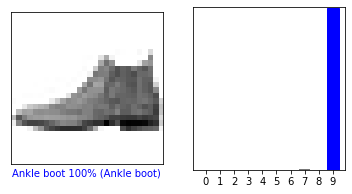

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

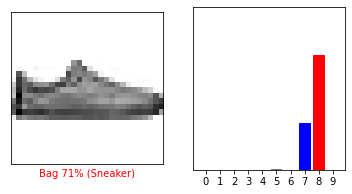

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

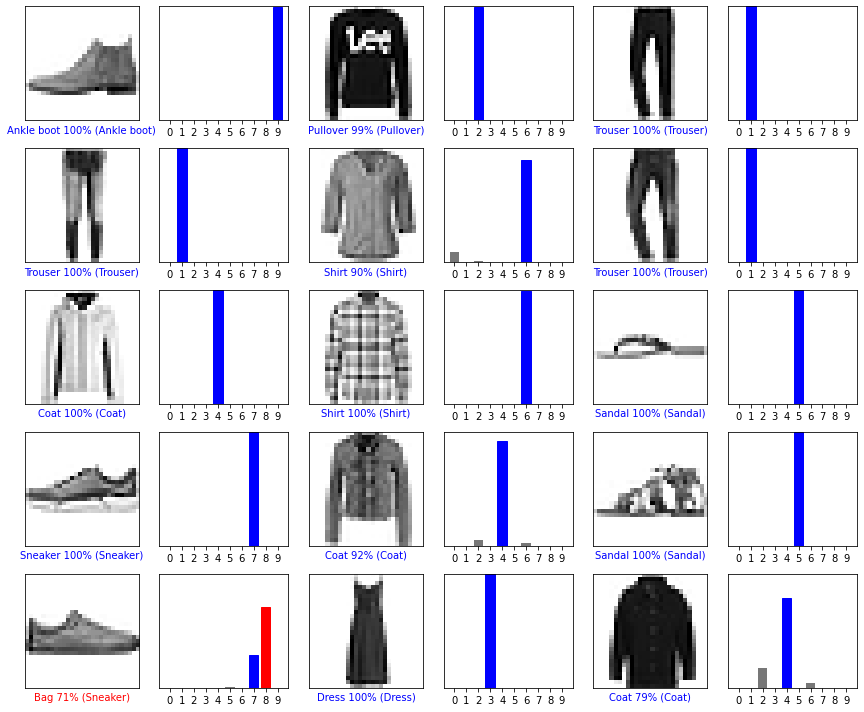

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.8914348e-05 1.3264636e-13 9.9108773e-01 1.2658383e-10 8.1463791e-03
  1.6905785e-08 6.7695131e-04 2.7492119e-17 5.1699739e-10 7.1339325e-17]]


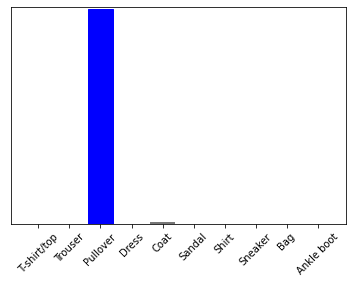

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.